In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import files
import io



In [6]:
pip install scikit-learn

In [11]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wta.csv']))
df.head()

Saving wta.csv to wta.csv


<ipython-input-11-6d434a74b2e5>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded['wta.csv']))


,Tournament,Date,Court,Surface,Round,Best of,Player_1,Player_2,Winner,Rank_1,Rank_2,Pts_1,Pts_2,Odd_1,Odd_2,Score
0,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Sun T.T.,Baker L.,Sun T.T.,81,272,332,90,1.33,3.00,6-1 6-1
1,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Myskina A.,Dulko G.,Dulko G.,16,59,1000,401,1.22,3.75,1-6 7-6 2-6
2,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Loit E.,Birnerova E.,Loit E.,56,84,418,324,1.72,2.00,6-1 6-1
3,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Nakamura A.,Craybas J.,Craybas J.,57,70,405,365,1.83,1.83,5-7 2-6
4,ASB Classic,2007-01-01 00:00:00,Outdoor,Hard,1st Round,3,Bartoli M.,Morita A.,Bartoli M.,18,180,951,152,1.16,4.50,7-6 6-3


📌 Tasks -

1.Are there any missing values in the dataset?If so, how will you handle them?

2.Present rows consisting information of final rounds of Wimbledon Tournament.

3.Plot a countplot depicting Winners vs No of Grand Slam Tournament wins

4.Are there any duplicated values?If so, how will you handle them?

5.Plot a stacked bar chart depicting distribution of Tournament wins(in different colours) of top 5 WTA players.

In [12]:
#Task 1
missing_values = df.isnull().sum()
print(missing_values)


Tournament    0
Date          0
Court         0
Surface       0
Round         0
Best of       0
Player_1      0
Player_2      0
Winner        0
Rank_1        0
Rank_2        0
Pts_1         0
Pts_2         0
Odd_1         0
Odd_2         0
Score         0
dtype: int64


In [13]:
#Task 2
filtered_data = df[df['Round'] == 'The Final']
print(filtered_data)

                                  Tournament                 Date    Court  \
28                               ASB Classic  2007-01-06 00:00:00  Outdoor   
58     Mondial Australian Women's Hardcourts  2007-01-06 00:00:00  Outdoor   
89             Moorilla Hobart International  2007-01-12 00:00:00  Outdoor   
114                   Medibank International  2007-01-12 00:00:00  Outdoor   
240                          Australian Open  2007-01-27 00:00:00  Outdoor   
...                                      ...                  ...      ...   
37396           Internationaux de Strasbourg  2023-05-27 00:00:00  Outdoor   
37518                            French Open  2023-06-10 00:00:00  Outdoor   
37547     Rosmalen Grass Court Championships  2023-06-18 00:00:00  Outdoor   
37578                        Nottingham Open  2023-06-18 00:00:00  Outdoor   
37636                      Rothesay Classic   2023-06-25 00:00:00  Outdoor   

      Surface      Round  Best of        Player_1        Player

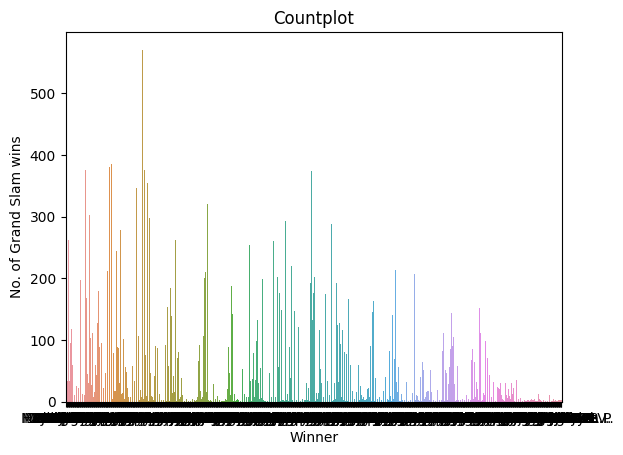

In [14]:
#Task 3
sns.countplot(x='Winner', data=df)

plt.xlabel('Winner')
plt.ylabel('No. of Grand Slam wins')
plt.title('Countplot')

# Show the plot
plt.show()

In [15]:
#Task 4
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows (all columns):\n", duplicate_rows)

Duplicate Rows (all columns):
 Empty DataFrame
Columns: [Tournament, Date, Court, Surface, Round, Best of, Player_1, Player_2, Winner, Rank_1, Rank_2, Pts_1, Pts_2, Odd_1, Odd_2, Score]
Index: []


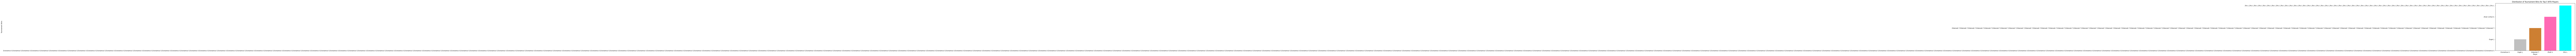

In [16]:
#Task 5


player_wins = df.groupby('Winner')['Winner'].sum().sort_values(ascending=False)


top_players = player_wins.head(5)


top_players_df = pd.DataFrame({'Player': top_players.index, 'Tournament Wins': top_players.values})

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_players_df['Player'], top_players_df['Tournament Wins'], color=['#FFD700', '#C0C0C0', '#CD7F32', '#FF69B4', '#00FFFF'])

# Set labels and title
plt.xlabel('Player')
plt.ylabel('Tournament Wins')
plt.title('Distribution of Tournament Wins for Top 5 WTA Players')

# Show the plot
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

columns = ['Tournament','Court','Surface','Round','Best of','Player_1','Player_2','Winner']
df = df[columns]

categorical_features = ['Tournament','Court','Surface','Round','Player_1','Player_2']
df_encoded = pd.get_dummies(df,columns = categorical_features)

X = df_encoded.drop('Winner',axis=1)
y = df_encoded['Winner']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6576780021253985
